In [1]:
import math
from glob import glob
import os

import cv2
import numpy as np
from PIL import Image
from pdf2image import convert_from_path
from imutils import resize
from sklearn.metrics import euclidean_distances
from tqdm import tqdm
from transformers.models.deprecated.deta.image_processing_deta import masks_to_boxes
from template_extraction import *

from scoring import *
from border_and_title import *

# files = [
#     "../../data/original/Good/300-014820.pdf",
#     "../../data/original/Good/300-014823.pdf",
#     "../../data/original/Good/300-014821.pdf",
#     "../../data/original/Good/300-014822.pdf"
# ]
# files = [
#     "../../data/original/Ugly/000.000.537.pdf",
#     "../../data/original/Ugly/000.001.296.pdf",
#     "../../data/original/Ugly/000.001.360.pdf",
#     "../../data/original/Ugly/000.001.389.pdf",
#     "../../data/original/Ugly/000.895.652.pdf",
#     # "../../data/original/Ugly/000.895.659.pdf",
#     # "../../data/original/Ugly/000.895.681.pdf",
#     # "../../data/original/Ugly/000.895.684.pdf",
#     # "../../data/original/Ugly/000.895.701 (1).pdf"
# ]
# files = [
#     "../../data/original/Ugly/000.001.024.pdf",
#     "../../data/original/Ugly/000.001.303.pdf",
#     "../../data/original/Ugly/000.001.373.pdf",
#     "../../data/original/Ugly/000.001.423.pdf",
#     "../../data/original/Ugly/000.895.692.pdf",
# ]
# files = [
#     "../../data/original/Ugly/1.pdf",
#     "../../data/original/Ugly/2.pdf",
#     "../../data/original/Ugly/3.pdf",
#     "../../data/original/Ugly/4.pdf",
#     "../../data/original/Ugly/5.pdf",
#     "../../data/original/Ugly/6.pdf",
#     "../../data/original/Ugly/7.pdf",
#     "../../data/original/Ugly/8.pdf",
#     "../../data/original/Ugly/9.pdf",
#     "../../data/original/Ugly/10.pdf",
#     "../../data/original/Ugly/11.pdf"
# ]
files = [
    "../../data/original/Good/15316-100-D-006_Sheet1.pdf",
    "../../data/original/Good/15316-100-D-020_Sheet2.pdf",
    "../../data/original/Good/15316-100-D-040_Sheet1.pdf",
    "../../data/original/Good/15316-100-D-041_Sheet1.pdf"
]

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2

def read_pdf(pdf_path):
    pages = convert_from_path(pdf_path, dpi=300)
    img = np.array(pages[0])
    img = im_resize(img)
    return img

Image Similarity: 93.8496%
Image Similarity: 93.2276%
Image Similarity: 91.8845%


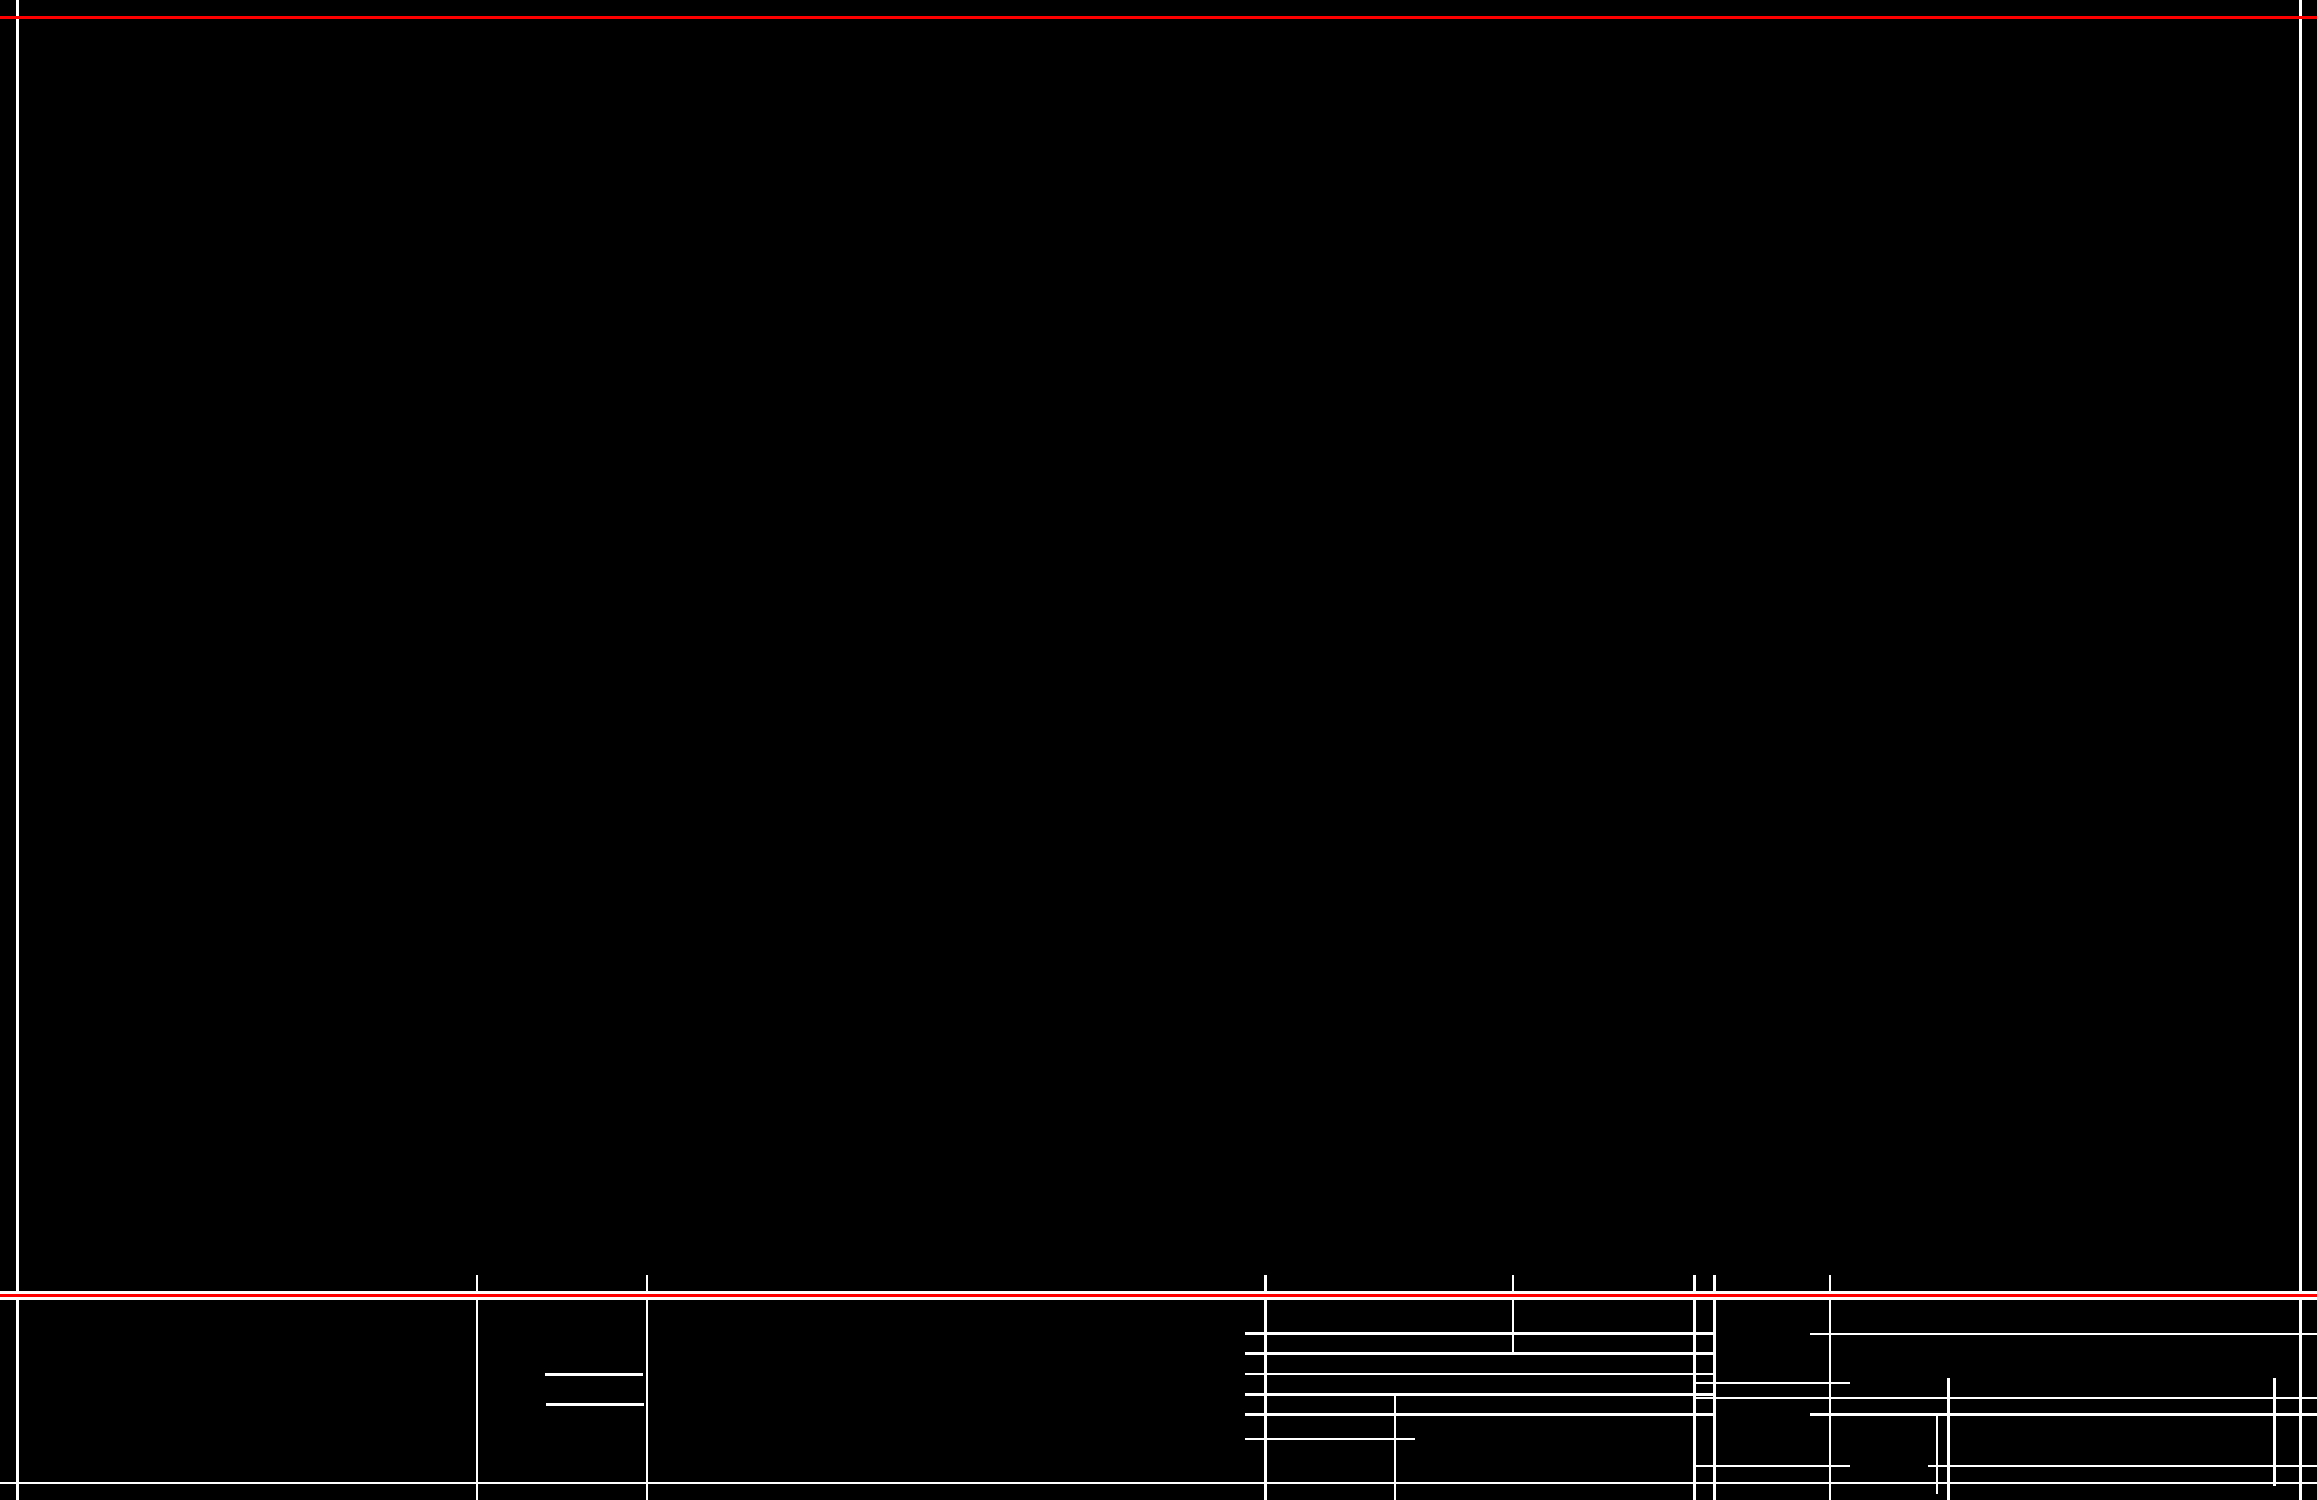

In [2]:
images = []
for f in files:
    img = read_pdf(f)
    images.append(img)


def get_structures(images):
    structures = []
    for img in images:
        title_contours, line_90, data = detect_probable_title_sections(img, return_states=True)
        structures.append(data["mask"])
        # structures.append(cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))

        # im_h, im_w, _ = img.shape
        # ocr_result = data["ocr_result"]
        # words = process_text(ocr_result, im_h, im_w)
        # img_comp = img.copy()
        #
        # for idx, row in words.iterrows():
        #     bx1, by1, bx2, by2 = row[["x1", "y1", "x2", "y2"]].astype(int)
        #     cv2.rectangle(img_comp, (bx1, by1), (bx2, by2), (255, 255, 255), cv2.FILLED)

    return structures


structures = get_structures(images)
borders, template = get_template_borders_from_structures(structures)
temp_copy = cv2.cvtColor(template.copy(), cv2.COLOR_GRAY2BGR)
for line in borders:
    x1, y1, x2, y2 = line
    cv2.line(temp_copy, (x1, y1), (x2, y2), color, thickness)

Image.fromarray(temp_copy)

In [ ]:
# merge with other methods
#     it will resolve the unnecessary intersection detection
#     it will create tight boxes for title block boundaries
# misses some common (partial) template parts
# currently we assume that all the images are in the same template and shape in an input batch